In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris,load_breast_cancer

# Classification problems

In [21]:
iris =  load_iris(return_X_y=False, as_frame=True)

In [22]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
data = iris['data']
data['target'] = iris['target']

In [26]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## EDA

In [27]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
import matplotlib.pyplot as plt

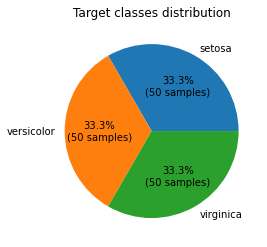

In [39]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} samples)".format(pct, absolute)

fig, ax = plt.subplots()
ax.pie(data.target.value_counts()
        ,labels=iris['target_names']
      ,autopct=lambda pct: func(pct, data.target.value_counts()))

ax.set_title("Target classes distribution")

plt.show()

In [47]:
from IPython.display import display
names = dict(zip(data.target.unique(),iris['target_names']))

for cls in data.target.unique():
    print(names[cls])
    display(data[data.target == cls].describe())

setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [48]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [51]:
data.iloc[:,0:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
two_d = pca.fit_transform(data.iloc[:,0:-1])
two_d.shape

(150, 2)

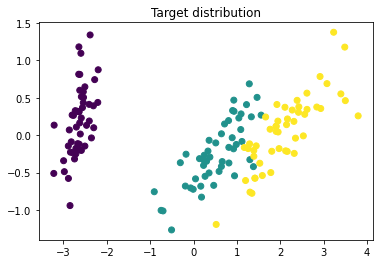

In [63]:
fig,ax = plt.subplots()

ax.scatter(two_d[:,0],two_d[:,1], c=data.target)
ax.set_title('Target distribution')
plt.show()

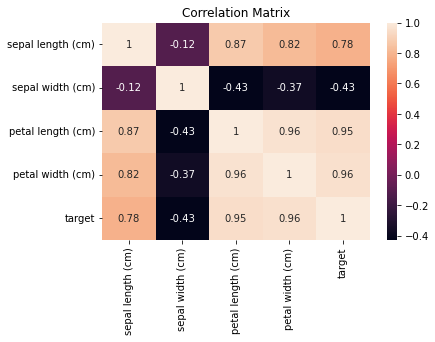

In [70]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr
           ,annot=True)
plt.title("Correlation Matrix")
plt.show()

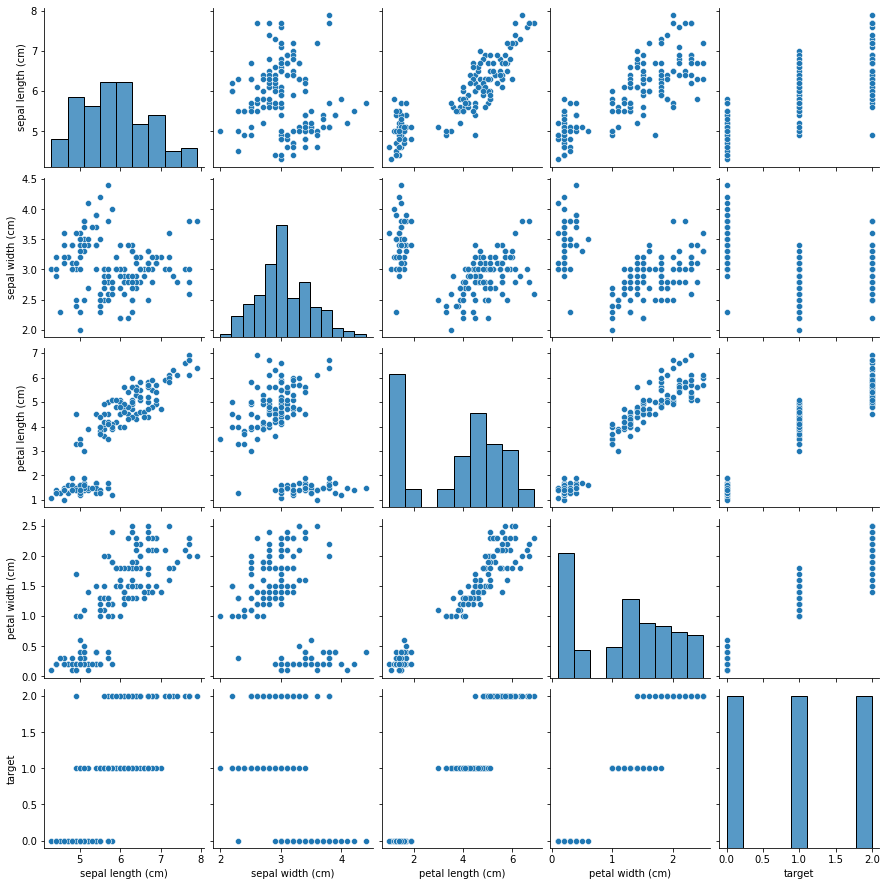

In [73]:
sns.pairplot(data)
plt.show()

# Modeling

In [75]:
!pip install xgboost

In [115]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


In [84]:
X,y = iris['data'].iloc[:,:-1],iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [86]:
scaler = StandardScaler()

In [158]:
pipe = Pipeline([("scaler", StandardScaler()),("knn", KNeighborsClassifier())])
rf = RandomForestClassifier()

params = {"knn__n_neighbors":[3,5,8]}
clf = GridSearchCV(pipe,params)
clf.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 8]})

In [159]:
clf.best_params_

{'knn__n_neighbors': 8}

In [165]:
xgb_model = xgb.XGBClassifier()
rf = RandomForestClassifier()
knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=8))])

ensambl = VotingClassifier(estimators=[('xgb_model',xgb_model)
                                       ,('rf',RandomForestClassifier())
                                         ,('knn',knn)])
                          
params = {"xgb_model__learning_rate":[0.001,0.01]
           ,'rf__max_depth':[3,5,8]}

clf = GridSearchCV(estimator=ensambl, param_grid=params, cv=2)
clf.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=VotingClassifier(estimators=[('xgb_model',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   gamma=None,
                                            

## Evaluation

In [218]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,classification_report

pred = clf.predict(X_test)
confusion_matrix(y_test,pred)

array([[18,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  8]], dtype=int64)

In [201]:
precision_score(y_test,pred, average='macro'),precision_score(y_test,pred, average='micro')

(0.9722222222222222, 0.9736842105263158)

In [202]:
recall_score(y_test,pred, average='macro'),precision_score(y_test,pred, average='micro')

(0.9629629629629629, 0.9736842105263158)

In [215]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      1.00      0.96        11
           2       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38

